In [1]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate a Fibonacci grating structure using meep


In [3]:
# define material
mat_A = mp.Medium(epsilon=12)  # 高折射率
mat_B = mp.Medium(epsilon=1)   # air epsilon

# construct Fibonacci sequence
def fibonacci_sequence(n):
    if n == 1:
        return "A"
    elif n == 2:
        return "AB"
    else:
        return fibonacci_sequence(n - 1) + fibonacci_sequence(n - 2)

sequence = fibonacci_sequence(5)  #  F(5) = ABAABABA

block_width = 1.0
geometry = []

for i, s in enumerate(sequence):
    x_pos = (-len(sequence)/2 + i + 0.5) * block_width
    if s == "A" :
        mat = mp.Medium(index=3.4) 
    else:
        mat = mp.Medium(index=1.0)
    geometry.append(mp.Block(material=mat,
                             size = mp.Vector3(block_width, mp.inf, mp.inf),
                             center = mp.Vector3(x_pos)
                             ))

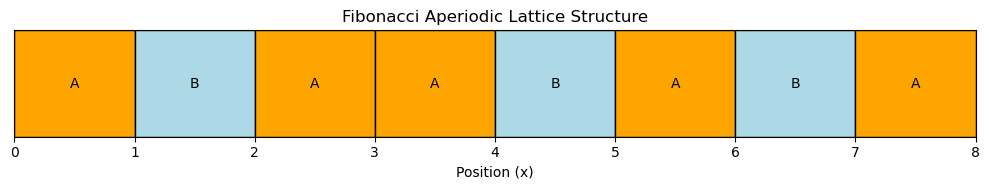

In [4]:
## plot the material

# 对应材料色块设置
colors = {'A': 'orange', 'B': 'lightblue'}

# 初始化图形
fig, ax = plt.subplots(figsize=(10, 2))

for i, symbol in enumerate(sequence):
    x_start = i * block_width
    ax.add_patch(plt.Rectangle((x_start, 0), block_width, 1,
                               facecolor=colors[symbol],
                               edgecolor='black'))
    ax.text(x_start + block_width/2, 0.5, symbol, ha='center', va='center')

# 设置坐标轴
ax.set_xlim(0, len(sequence) * block_width)
ax.set_ylim(0, 1)
ax.set_yticks([])
ax.set_xlabel("Position (x)")
ax.set_title("Fibonacci Aperiodic Lattice Structure")
plt.tight_layout()
plt.show()

# 2. Generate the source


In [ ]:
cell = mp.Vector3(len(sequence) * block_width / 2)
sources = [mp.Source(mp.ContinuousSource(frequency=0.15),
                     component=mp.Ez,
                     center=mp.Vector3(-cell.x/2 + 1))]

# 3.simulation

In [ ]:
sim = mp.Simulation(cell_size=cell,
                    geometry=geometry,
                    sources=sources,
                    boundary_layers=[mp.PML(1.0)],
                    resolution=20)
sim.run(until=200)

# 4. Plot the data


In [ ]:
# 采样透射数据
flux_region = mp.FluxRegion(center=mp.Vector3(6)) 
flux = sim.add_flux(0.15, 0.1, 100, flux_region)  # frequency range: 0.15 ± 0.05

# 输出透射谱
flux_freqs = mp.get_flux_freqs(flux)
flux_data = mp.get_fluxes(flux)

plt.plot(flux_freqs, flux_data)
plt.xlabel("Frequency")
plt.ylabel("Transmitted flux")
plt.title("Transmission Spectrum of Fibonacci Grating (F5)")
plt.grid(True)
plt.show()
